In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
from nsepy import get_history
infy = get_history(symbol='INFY',start=date(2015,1,1),end=date(2018,9,30))
tcs = get_history(symbol='TCS',start=date(2015,1,1),end=date(2018,9,30))
nifty = get_history(symbol='NIFTYIT',start=date(2015,1,1),end=date(2018,9,30),index=True)
print(infy.shape)
print(tcs.shape)
print(nifty.shape)
data=dict()
data["INFY"]=infy
data["TCS"]=tcs
data["NIFTY"]=nifty

(928, 14)
(928, 14)
(928, 6)


In [160]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [161]:
nifty.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150.0,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862.0,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018.0,1.059000e+10
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739.0,1.364500e+10
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356.0,1.203440e+10


In [162]:
print(infy.isnull().sum(),"\n")
print((nifty.isnull().sum()),"\n")
print((tcs.isnull().sum()))

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64 

Open        0
High        0
Low         0
Close       0
Volume      8
Turnover    8
dtype: int64 

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


In [163]:
for i in data:
    data[i].index=pd.to_datetime(data[i].index)

In [165]:
for i in data:
    data[i].drop(list(data[i].select_dtypes(include=['object']).columns),axis=1,inplace=True)
    if i=="NIFTY":
        pass
data["INFY"].head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [166]:
for i in data:
    data[i]['Date']=data[i].index
data["INFY"].head(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,1974.4,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015-01-01
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,2013.2,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015-01-02


In [167]:
for i in data:
    data[i]["Year"]=data[i].index.year
    data[i]["Month"]=data[i].index.month
    data[i]["Day"]=data[i].index.day
data["INFY"].head(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,Year,Month,Day
Date,,,,,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,1974.4,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015-01-01,2015,1,1
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,2013.2,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015-01-02,2015,1,2


In [168]:
data_dixt=dict()

data_dixt["infy_max"]=data["INFY"].pivot_table(index=["Year","Month"],values=["Close","Trades"],aggfunc=np.max)
data_dixt["infy_min"]=data["INFY"].pivot_table(index=["Year","Month"],values=["Close","Trades"],aggfunc=np.min)
data_dixt["tcs_max"]=data["TCS"].pivot_table(index=["Year","Month"],values=["Close","Trades"],aggfunc=np.max)
data_dixt["tcs_min"]=data["TCS"].pivot_table(index=["Year","Month"],values=["Close","Trades"],aggfunc=np.min)
data_dixt["nifty_max"]=data["NIFTY"].pivot_table(index=["Year","Month"],values=["Close","Volume"],aggfunc=np.max)
data_dixt["nifty_min"]=data["NIFTY"].pivot_table(index=["Year","Month"],values=["Close","Volume"],aggfunc=np.min)

for ke,values in data_dixt.items():
    data_dixt[ke].reset_index(inplace=True)
    
from datetime import date
def create_date(row):
    return date(int(row.Year),int(row.Month),1)
for key,values in data_dixt.items():
    data_dixt[key]["Date"]=data_dixt[key].apply(create_date,axis=1)
data_dixt["tcs_max"].head()

,Year,Month,Close,Trades,Date
0,2015,1,2579.45,127847,2015-01-01
1,2015,2,2704.75,132132,2015-02-01
2,2015,3,2776.00,89030,2015-03-01
3,2015,4,2664.55,167402,2015-04-01
4,2015,5,2617.90,97392,2015-05-01


In [96]:
infy.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,Year,Month,Day
Date,,,,,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015-01-01,2015,1,1
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015-01-02,2015,1,2
2015-01-05,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,2015-01-05,2015,1,5
2015-01-06,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,2015-01-06,2015,1,6
2015-01-07,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,2015-01-07,2015,1,7


In [97]:
for key,values in data_dixt.items():
    data_dixt[key].drop(["Year","Month"],axis=1,inplace=True)
data_dixt['tcs_max'].columns

Index(['Close', 'High', 'Low', 'Trades', 'Date'], dtype='object')

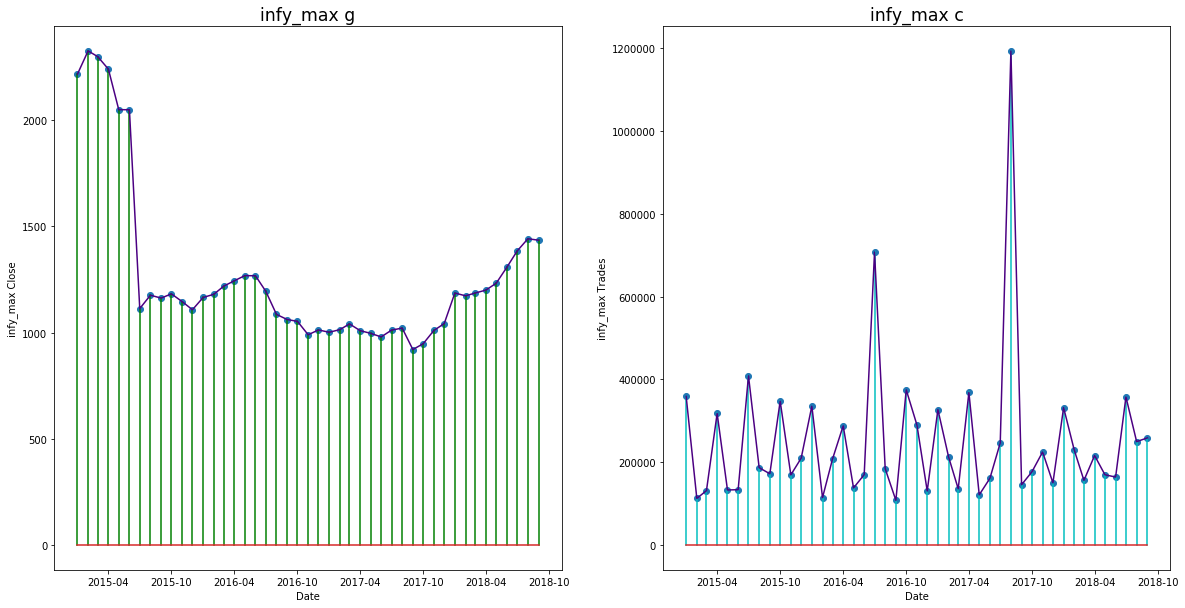

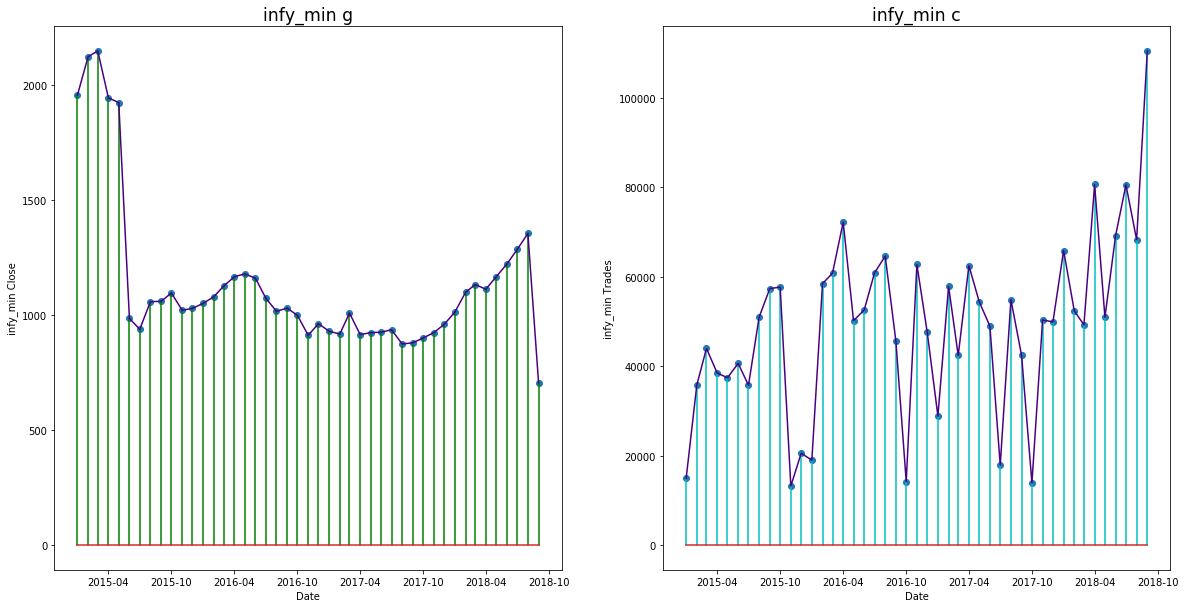

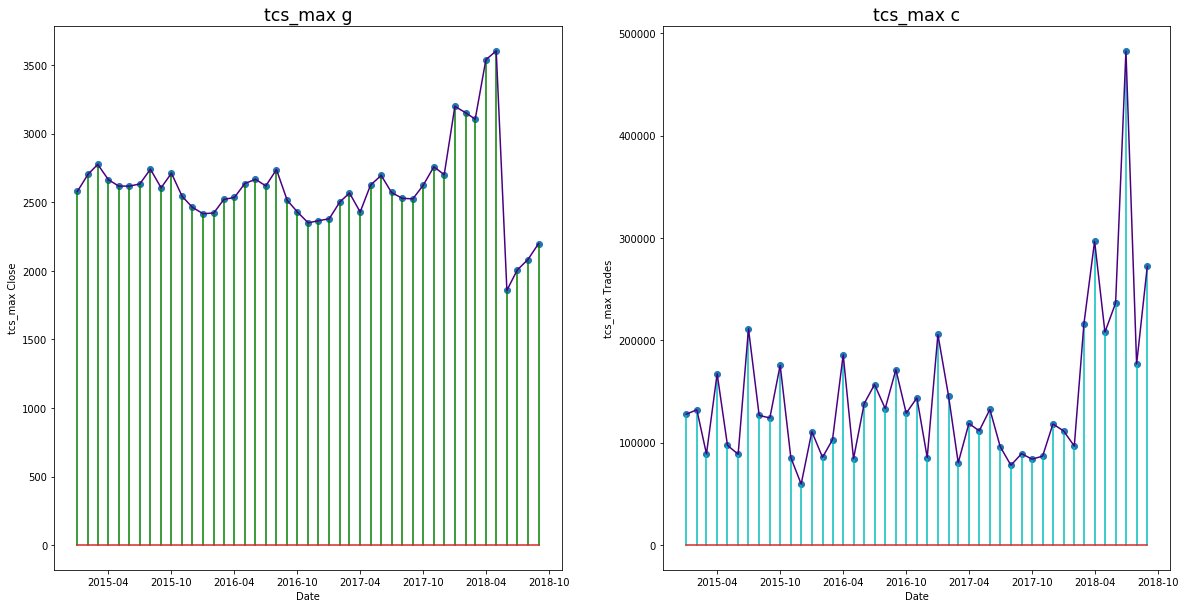

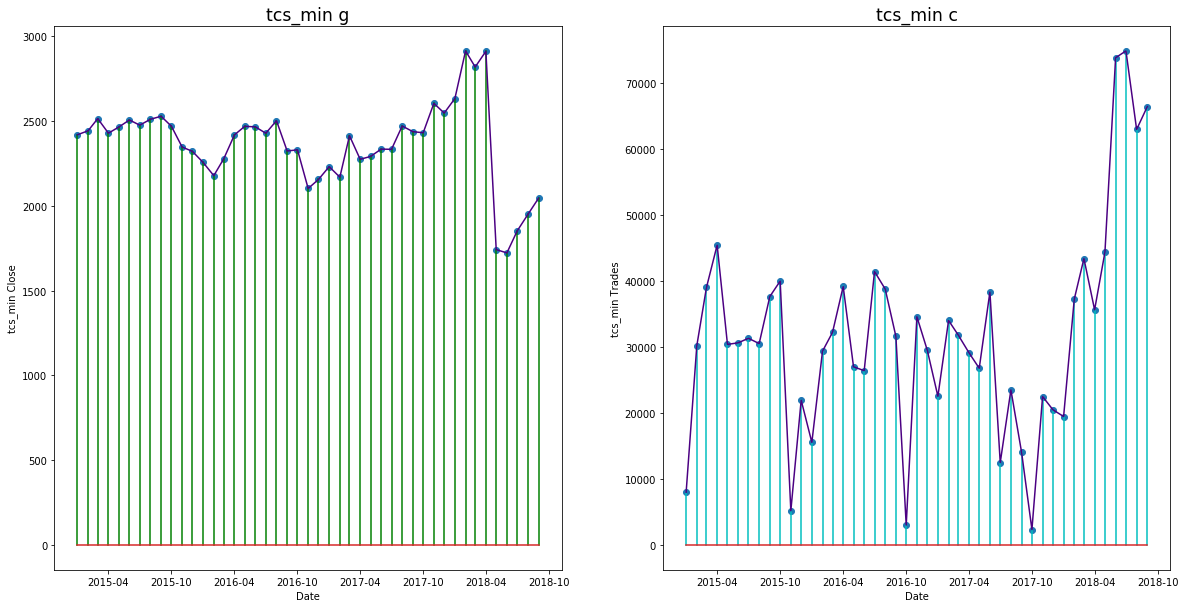

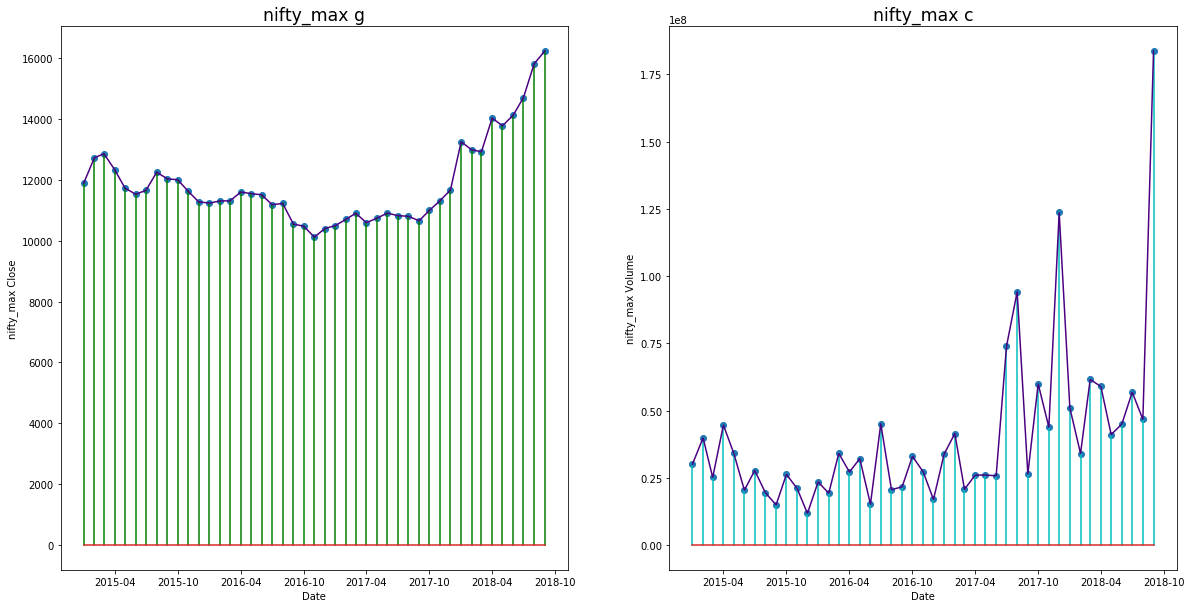

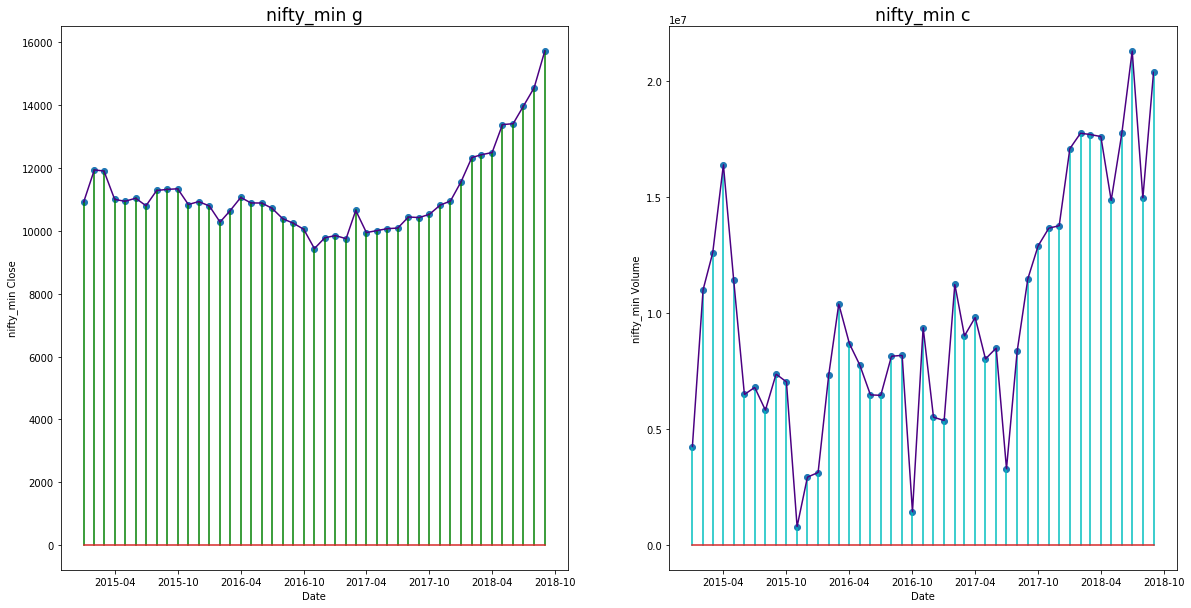

In [134]:
for i in data_dixt:
    color_list=['g', 'c']
    if i in ["nifty_max","nifty_min"]:
        col_list=['Close',"Volume"]
    else:
        col_list=['Close',"Trades"]
    fig=plt.figure(figsize=(20,10))
    for x in range(1,3):
        fig.add_subplot(1,2,x)
        plt.stem(data_dixt[i].Date,data_dixt[i][col_list[x-1]],color_list[x-1])
        plt.plot(data_dixt[i].Date,data_dixt[i][col_list[x-1]],color='indigo')
        plt.ylabel(i+" "+col_list[x-1]).set_fontsize('large')
        plt.xlabel("Date").set_fontsize('large')
        plt.title(i+" "+col_list[x-1]).set_fontsize('xx-large')

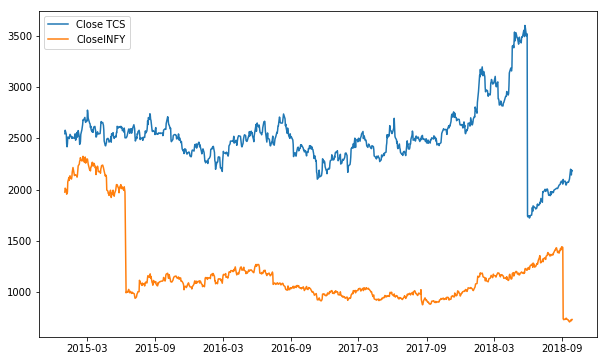

In [137]:
fig=plt.figure(figsize=(10,6))
for i in [tcs,infy]:
    plt.plot(i.index,i.Close)
    plt.legend(['Close TCS','Close INFY'])

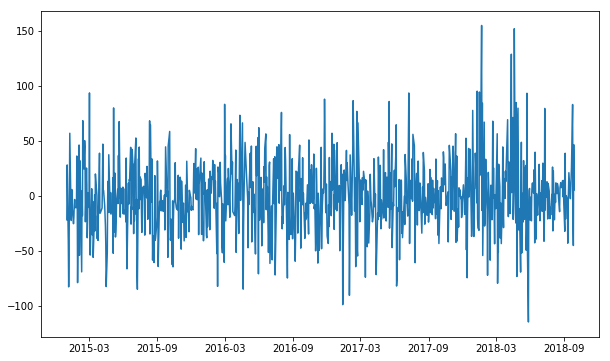

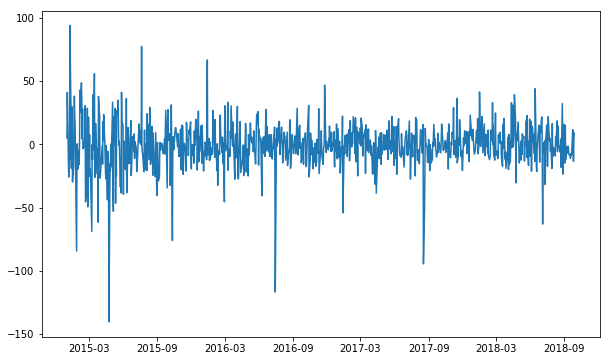

In [9]:
for i in [tcs,infy]:
    fig=plt.figure(figsize=(10,6))
    plt.plot(i.index,i.Close-i.Open)
    plt.title('')

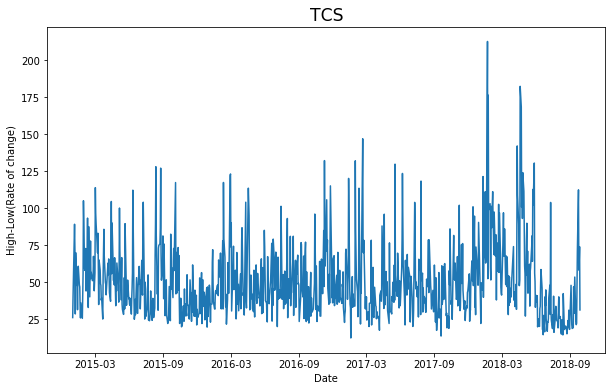

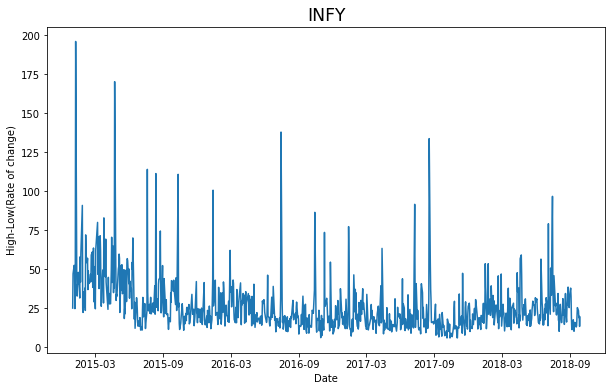

In [147]:
l=0
for i in [tcs,infy]:
    fig=plt.figure(figsize=(10,6))
    plt.plot(i.index,i.High-i.Low)
    plt.xlabel('Date')
    plt.ylabel('High-Low(Rate of change)')
    if l==0:
        plt.title('TCS').set_fontsize('xx-large')
    else:
        plt.title('INFY').set_fontsize('xx-large')
    l=l+1

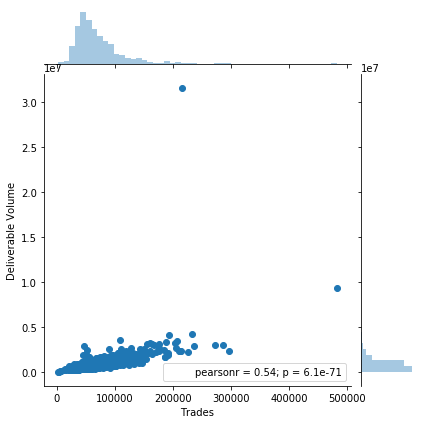

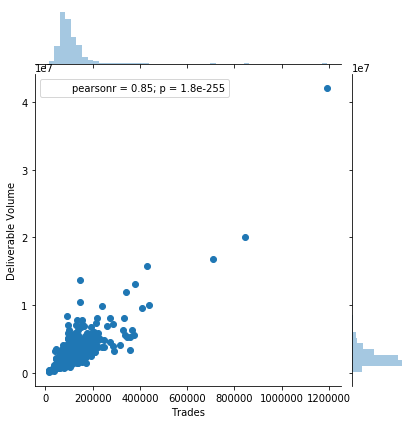

In [148]:
for i in [tcs,infy]:
    sns.jointplot("Trades","Deliverable Volume", data=i)

In [149]:
infy.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Year,Month,Day
Prev Close,1.000000,0.993662,0.993344,0.993044,0.992825,0.992801,0.993234,-0.187840,0.016086,-0.136517,-0.219649,0.068849,-0.421858,-0.381394,-0.010088
Open,0.993662,1.000000,0.999419,0.999277,0.998835,0.998824,0.999267,-0.191038,0.016088,-0.138450,-0.220882,0.076405,-0.422680,-0.382832,-0.006831
High,0.993344,0.999419,1.000000,0.999161,0.999444,0.999448,0.999710,-0.185005,0.024000,-0.131767,-0.216451,0.067424,-0.422130,-0.384530,-0.005552
Low,0.993044,0.999277,0.999161,1.000000,0.999539,0.999554,0.999705,-0.206685,-0.000921,-0.155751,-0.234345,0.083302,-0.419424,-0.383139,-0.006925
Last,0.992825,0.998835,0.999444,0.999539,1.000000,0.999975,0.999832,-0.198690,0.008817,-0.147249,-0.227798,0.075497,-0.420533,-0.384472,-0.005919
Close,0.992801,0.998824,0.999448,0.999554,0.999975,1.000000,0.999855,-0.198712,0.008764,-0.147202,-0.227855,0.075459,-0.420407,-0.384482,-0.006063
VWAP,0.993234,0.999267,0.999710,0.999705,0.999832,0.999855,1.000000,-0.197063,0.010648,-0.145110,-0.226698,0.074533,-0.420613,-0.383917,-0.005973
Volume,-0.187840,-0.191038,-0.185005,-0.206685,-0.198690,-0.198712,-0.197063,1.000000,0.960516,0.908071,0.962788,-0.193897,0.196086,0.041980,0.117657
Turnover,0.016086,0.016088,0.024000,-0.000921,0.008817,0.008764,0.010648,0.960516,1.000000,0.902356,0.913894,-0.199300,0.124645,-0.051813,0.129661
Trades,-0.136517,-0.138450,-0.131767,-0.155751,-0.147249,-0.147202,-0.145110,0.908071,0.902356,1.000000,0.846275,-0.235282,0.186496,0.014099,0.089081


In [156]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    fig=plt.figure(figsize=(10,6))
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=20).mean()
    rolstd = timeseries.rolling(window=20).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','10_day_volatility', '50_day_moving_avg'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

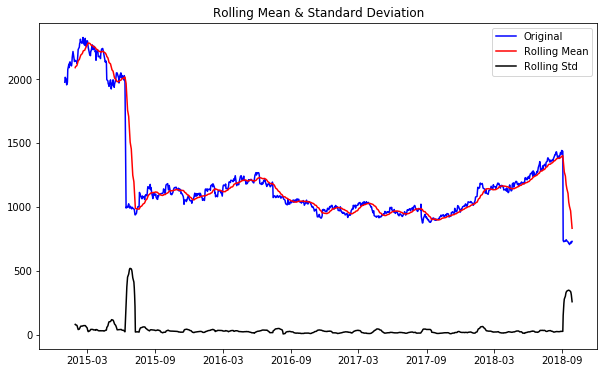

Results of Dickey-Fuller Test:
Test Statistic           -2.227994
p-value                   0.196243
10_day_volatility         0.000000
50_day_moving_avg       927.000000
Critical Value (1%)      -3.437424
Critical Value (5%)      -2.864663
Critical Value (10%)     -2.568433
dtype: float64


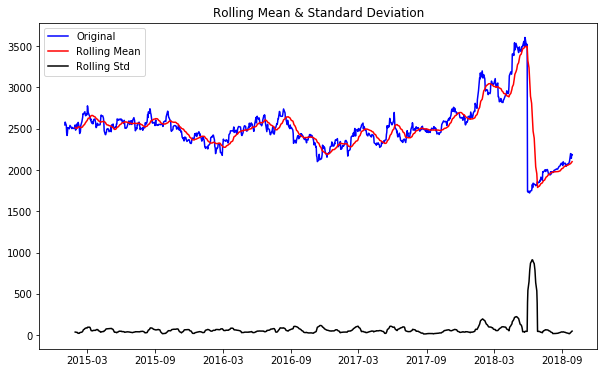

Results of Dickey-Fuller Test:
Test Statistic           -3.417485
p-value                   0.010377
10_day_volatility         0.000000
50_day_moving_avg       927.000000
Critical Value (1%)      -3.437424
Critical Value (5%)      -2.864663
Critical Value (10%)     -2.568433
dtype: float64


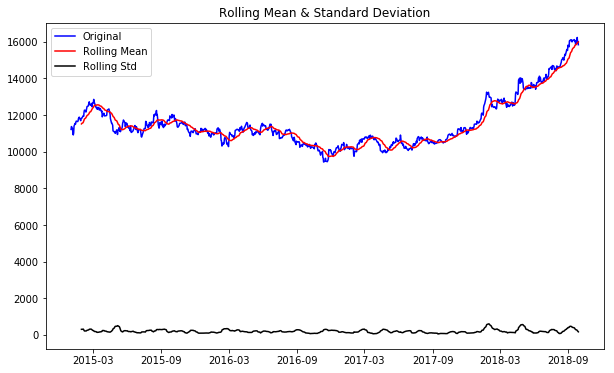

Results of Dickey-Fuller Test:
Test Statistic            0.551533
p-value                   0.986358
10_day_volatility         0.000000
50_day_moving_avg       927.000000
Critical Value (1%)      -3.437424
Critical Value (5%)      -2.864663
Critical Value (10%)     -2.568433
dtype: float64


In [157]:
for i in [infy,tcs,nifty]:
    test_stationarity(i.Close)